In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
working_folder='/content/drive/MyDrive/TransformersCode/05-Service_Center/'

photos_folder=working_folder + 'photos/'

In [6]:
import pandas as pd

csv_file_path = photos_folder + 'fer2013.csv'
fer_df = pd.read_csv(csv_file_path)

fer_df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
print(fer_df.shape)

(35887, 3)


In [8]:
import numpy as np

def process_pixels(pixel_string):

    lst=list(map(int, pixel_string.split()))

    pixels = np.array(lst, dtype=np.uint8)
    return pixels

In [9]:
fer_df['pixels_array'] = fer_df['pixels'].apply(process_pixels)

In [10]:
unique_emotions = fer_df['emotion'].unique()

unique_emotions

array([0, 2, 4, 6, 3, 5, 1])

In [11]:
fer_df_training=fer_df[fer_df['Usage']=='Training']

emotion_counts = fer_df_training['emotion'].value_counts()
emotion_counts

,count
emotion,
3,7215
6,4965
4,4830
2,4097
0,3995
5,3171
1,436


In [12]:
min_emotion_training_count = emotion_counts.min()

min_emotion_training_count

436

In [15]:
fer_df_val=fer_df[fer_df['Usage']=='PublicTest']
emotion_counts = fer_df_val['emotion'].value_counts()
min_emotion_val_count = emotion_counts.min()

min_emotion_val_count

56

In [14]:
fer_df_testing=fer_df[fer_df['Usage']=='PrivateTest']
emotion_counts = fer_df_testing['emotion'].value_counts()
min_emotion_testing_count = emotion_counts.min()

min_emotion_testing_count

55

In [16]:
selected_rows = []

for emotion in unique_emotions:
    emotion_rows = fer_df[(fer_df['emotion'] == emotion) & (fer_df['Usage'] == 'Training')]

    random_indices = np.random.choice(emotion_rows.index, size=2*min_emotion_training_count, replace=True)

    selected_rows.extend(random_indices)

fer_train_df = fer_df.loc[selected_rows]


selected_rows = []

for emotion in unique_emotions:
    emotion_rows = fer_df[(fer_df['emotion'] == emotion) & (fer_df['Usage'] == 'PublicTest')]
    random_indices = np.random.choice(emotion_rows.index, size=2*min_emotion_val_count, replace=True)
    selected_rows.extend(random_indices)

fer_val_df = fer_df.loc[selected_rows]

selected_rows = []
for emotion in unique_emotions:
    emotion_rows = fer_df[(fer_df['emotion'] == emotion) & (fer_df['Usage'] == 'PrivateTest')]
    random_indices = np.random.choice(emotion_rows.index, size=2*min_emotion_testing_count, replace=True)
    selected_rows.extend(random_indices)

fer_test_df = fer_df.loc[selected_rows]

In [17]:
fer_train_df.reset_index(drop=True, inplace=True)
fer_test_df.reset_index(drop=True, inplace=True)
fer_val_df.reset_index(drop=True, inplace=True)

In [18]:
print(len(fer_train_df))
print(len(fer_val_df))
print(len(fer_test_df))

6104
784
770


In [19]:
pixels_array0=fer_train_df.loc[0,'pixels_array']

pixels_array0

array([ 51,  49,  47, ..., 128,  54,  71], dtype=uint8)

array([[ 51,  49,  47, ...,  37,  38,  48],
       [ 49,  48,  49, ...,  37,  43,  55],
       [ 50,  51,  48, ...,  39,  49,  58],
       ...,
       [ 37,  38,  38, ...,  35,  36,  38],
       [ 37,  38,  40, ...,  41,  35,  35],
       [ 37,  38,  38, ..., 128,  54,  71]], dtype=uint8)
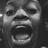

In [20]:
image0 = np.reshape(pixels_array0, (48, 48))

image0

In [21]:
image0_rgb = image0[..., np.newaxis]

image0_rgb

array([[[ 51],
        [ 49],
        [ 47],
        ...,
        [ 37],
        [ 38],
        [ 48]],

       [[ 49],
        [ 48],
        [ 49],
        ...,
        [ 37],
        [ 43],
        [ 55]],

       [[ 50],
        [ 51],
        [ 48],
        ...,
        [ 39],
        [ 49],
        [ 58]],

       ...,

       [[ 37],
        [ 38],
        [ 38],
        ...,
        [ 35],
        [ 36],
        [ 38]],

       [[ 37],
        [ 38],
        [ 40],
        ...,
        [ 41],
        [ 35],
        [ 35]],

       [[ 37],
        [ 38],
        [ 38],
        ...,
        [128],
        [ 54],
        [ 71]]], dtype=uint8)

In [22]:
image0_rgb.shape

(48, 48, 1)

array([[[ 51,  51,  51],
        [ 49,  49,  49],
        [ 47,  47,  47],
        ...,
        [ 37,  37,  37],
        [ 38,  38,  38],
        [ 48,  48,  48]],

       [[ 49,  49,  49],
        [ 48,  48,  48],
        [ 49,  49,  49],
        ...,
        [ 37,  37,  37],
        [ 43,  43,  43],
        [ 55,  55,  55]],

       [[ 50,  50,  50],
        [ 51,  51,  51],
        [ 48,  48,  48],
        ...,
        [ 39,  39,  39],
        [ 49,  49,  49],
        [ 58,  58,  58]],

       ...,

       [[ 37,  37,  37],
        [ 38,  38,  38],
        [ 38,  38,  38],
        ...,
        [ 35,  35,  35],
        [ 36,  36,  36],
        [ 38,  38,  38]],

       [[ 37,  37,  37],
        [ 38,  38,  38],
        [ 40,  40,  40],
        ...,
        [ 41,  41,  41],
        [ 35,  35,  35],
        [ 35,  35,  35]],

       [[ 37,  37,  37],
        [ 38,  38,  38],
        [ 38,  38,  38],
        ...,
        [128, 128, 128],
        [ 54,  54,  54],
        [ 71,  71,  71]]], dtype=uint8)
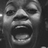

In [23]:
image0_rgb = np.repeat(image0_rgb, 3, axis=2)

image0_rgb

In [24]:
def prepare_fer_data(df):

    image_list = []

    image_labels = list(map(int, df['emotion']))

    for index,row in df.iterrows():

        pixels_array=row['pixels_array']

        image = np.reshape(pixels_array, (48, 48))

        image = image[..., np.newaxis]

        image = np.repeat(image, 3, axis=2)

        image = image.astype(int).tolist()

        image_list.append(image)

    output_df = pd.DataFrame(list(zip(image_list, image_labels)),
               columns =['img', 'label'])

    return output_df

In [25]:
fer_train_df = prepare_fer_data(fer_train_df)
fer_val_df = prepare_fer_data(fer_val_df)
fer_test_df = prepare_fer_data(fer_test_df)

In [26]:
fer_train_df.head()

,img,label
0,"[[[51, 51, 51], [49, 49, 49], [47, 47, 47], [4...",0
1,"[[[86, 86, 86], [95, 95, 95], [70, 70, 70], [8...",0
2,"[[[141, 141, 141], [148, 148, 148], [155, 155,...",0
3,"[[[216, 216, 216], [169, 169, 169], [148, 148,...",0
4,"[[[110, 110, 110], [120, 120, 120], [141, 141,...",0


In [27]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.5 MB/s eta 0:00:00


In [28]:
from datasets import *

In [29]:
train_ds = Dataset.from_pandas(fer_train_df)

train_ds

Dataset({
    features: ['img', 'label'],
    num_rows: 6104
})

In [30]:
val_ds = Dataset.from_pandas(fer_val_df)

val_ds

Dataset({
    features: ['img', 'label'],
    num_rows: 784
})

In [31]:
test_ds = Dataset.from_pandas(fer_test_df)
test_ds

Dataset({
    features: ['img', 'label'],
    num_rows: 770
})

In [33]:
train_ds.save_to_disk(working_folder  + 'train_dataset')
val_ds.save_to_disk(working_folder + 'val_dataset')
test_ds.save_to_disk(working_folder +'test_dataset')

Saving the dataset (0/1 shards):   0%|          | 0/6104 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/784 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/770 [00:00<?, ? examples/s]